In [1]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

In [2]:
from glob import glob


In [3]:
train_path='Dataset/train'
valid_path='Dataset/test'

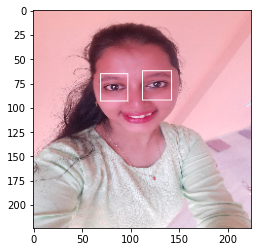

In [18]:
categories=['train','test']
data=[]
eye_counter = 0
for category in categories:
    path=os.path.join('Dataset',category)
    for file in os.listdir(path):
        if not file.startswith('.'):
            img_path=os.path.join(path,file)
            files=os.listdir(img_path)
            for i in files:
                p=os.path.join(img_path,i)
                #print(p)
                ii = cv2.imread(p)
                img=cv2.resize(ii,(224,224))
                face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
                eyes_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
                faces_detected = face_cascade.detectMultiScale(img, scaleFactor=1.01, minNeighbors=5)
                (x, y, w, h) = faces_detected[0]
                eyes = eyes_cascade.detectMultiScale(img[y:y+h, x:x+w])
                count=0;
                for (ex, ey, ew, eh) in eyes:
                    cv2.rectangle(img, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (255, 255, 255), 1)
                    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB ) 
                    plt.imshow(gray_image,cmap='Greys')
                    p=-5
                    cv2.imwrite(('Dataset/Training/'+'crop'+str(count)+'.jpg'), img[y-p+1:y+h+p, x-p+1:x+w+p])
                    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB ) 
                    plt.imshow(gray_image,cmap='Greys')
                    count=count+1;
                    
               